In [0]:
# Mario Cortez | Nour Azar | Tatiane Dutra
# Big Data Tools
# Master of Science in Big Data and Analytics for Business 2021-2022

In [0]:
# Data Preprocessing and Exploratory Analysis of Table
### Business
### Checkin
### Tips
### Review
### User
### Covid

# Model Fitting 
### Variables Selection
### Model Fitting with Cross Validation
### Models Performance

# Analysis 
### Lift Curve
### Business Profilling

In [0]:
# install packages
!pip install missingno
!pip install nltk
!pip install xgboost
!pip install sklearn
!pip install wordcloud
!pip install spark_ml_utils
!pip install Basemap

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-6680d72d-7200-419b-9cb6-746db2cec10b/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-6680d72d-7200-419b-9cb6-746db2cec10b/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-6680d72d-7200-419b-9cb6-746db2cec10b/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-6680d72d-7200-419b-9cb6-746db2cec10b/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-6680d72d-7200-419b-9cb6-746db2cec10b/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-6680d72d-7200-419b-9cb6-746db2cec10b/bin/python -m pip install --upgrade 

In [0]:
import pyspark
from pyspark.sql.types import StructField
from pyspark.sql.types import StructType
from pyspark.sql.types import *
from pyspark.sql.types import StringType, ArrayType, StructType
from pyspark.sql.functions import explode
import pandas as pd
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
#from mpl_toolkits.basemap import Basemap
#import nltk 
#nltk.download('stopwords')

# Import libraries
from pyspark.sql.functions import *
from pyspark.sql.functions import to_timestamp 
from pyspark.sql.types import *
import matplotlib.pyplot as plt

In [0]:
# path

# timeline date
date_timeline = to_date(lit("2018-12-31"), "yyyy-MM-dd")

In [0]:
pd.set_option('display.max_columns', None)

In [0]:
# Business Table
business = spark.read.json("/FileStore/tables/parsed_business.json", multiLine = "true")
business.printSchema()

# Creating pandas dataframe to visualize the table
name_list= list(map(lambda x: x.replace("attributes.","" ), business.columns))
business = business.toDF(*name_list)
business_df = business.toPandas()
pd.set_option('display.max_columns', None)
business_df.head(2)

root
 |-- address: string (nullable = true)
 |-- attributes.AcceptsInsurance: string (nullable = true)
 |-- attributes.AgesAllowed: string (nullable = true)
 |-- attributes.Alcohol: string (nullable = true)
 |-- attributes.Ambience: string (nullable = true)
 |-- attributes.BYOB: string (nullable = true)
 |-- attributes.BYOBCorkage: string (nullable = true)
 |-- attributes.BestNights: string (nullable = true)
 |-- attributes.BikeParking: string (nullable = true)
 |-- attributes.BusinessAcceptsBitcoin: string (nullable = true)
 |-- attributes.BusinessAcceptsCreditCards: string (nullable = true)
 |-- attributes.BusinessParking: string (nullable = true)
 |-- attributes.ByAppointmentOnly: string (nullable = true)
 |-- attributes.Caters: string (nullable = true)
 |-- attributes.CoatCheck: string (nullable = true)
 |-- attributes.Corkage: string (nullable = true)
 |-- attributes.DietaryRestrictions: string (nullable = true)
 |-- attributes.DogsAllowed: string (nullable = true)
 |-- attributes

,address,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,BusinessParking,ByAppointmentOnly,Caters,CoatCheck,Corkage,DietaryRestrictions,DogsAllowed,DriveThru,GoodForDancing,GoodForKids,GoodForMeal,HairSpecializesIn,HappyHour,HasTV,Music,NoiseLevel,Open24Hours,OutdoorSeating,RestaurantsAttire,RestaurantsCounterService,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi,business_id,categories,city,hours.Friday,hours.Monday,hours.Saturday,hours.Sunday,hours.Thursday,hours.Tuesday,hours.Wednesday,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,25 The West Mall,None,None,None,None,None,None,None,False,None,None,"{'garage': False, 'street': False, 'validated'...",True,None,None,None,None,None,None,None,True,None,None,None,None,None,None,None,None,None,None,None,None,3,None,None,None,None,None,None,-00iClV0kYHkvipphtNn7Q,"Hair Salons, Blow Dry/Out Services, Hair Remov...",Etobicoke,9:0-21:0,9:0-21:0,9:0-21:0,11:0-19:0,9:0-21:0,9:0-21:0,9:0-21:0,1,43.6117,-79.5572,Tonyc Salon & Spa,M9C 1B8,8,4.0,ON
1,"3215 Highway 7 E, Unit G1A",None,None,None,None,None,None,None,None,None,None,None,True,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,u'free',-0FA-Qdi3SPYIoJz9UQw-A,"Hair Salons, Beauty & Spas",Markham,10:30-20:0,0:0-0:0,10:30-20:0,10:30-19:0,10:30-20:0,10:30-20:0,10:30-20:0,1,43.8503,-79.3513,J Bon Hair Spa,L3R 3P3,14,4.0,ON


Out[36]: <AxesSubplot:>

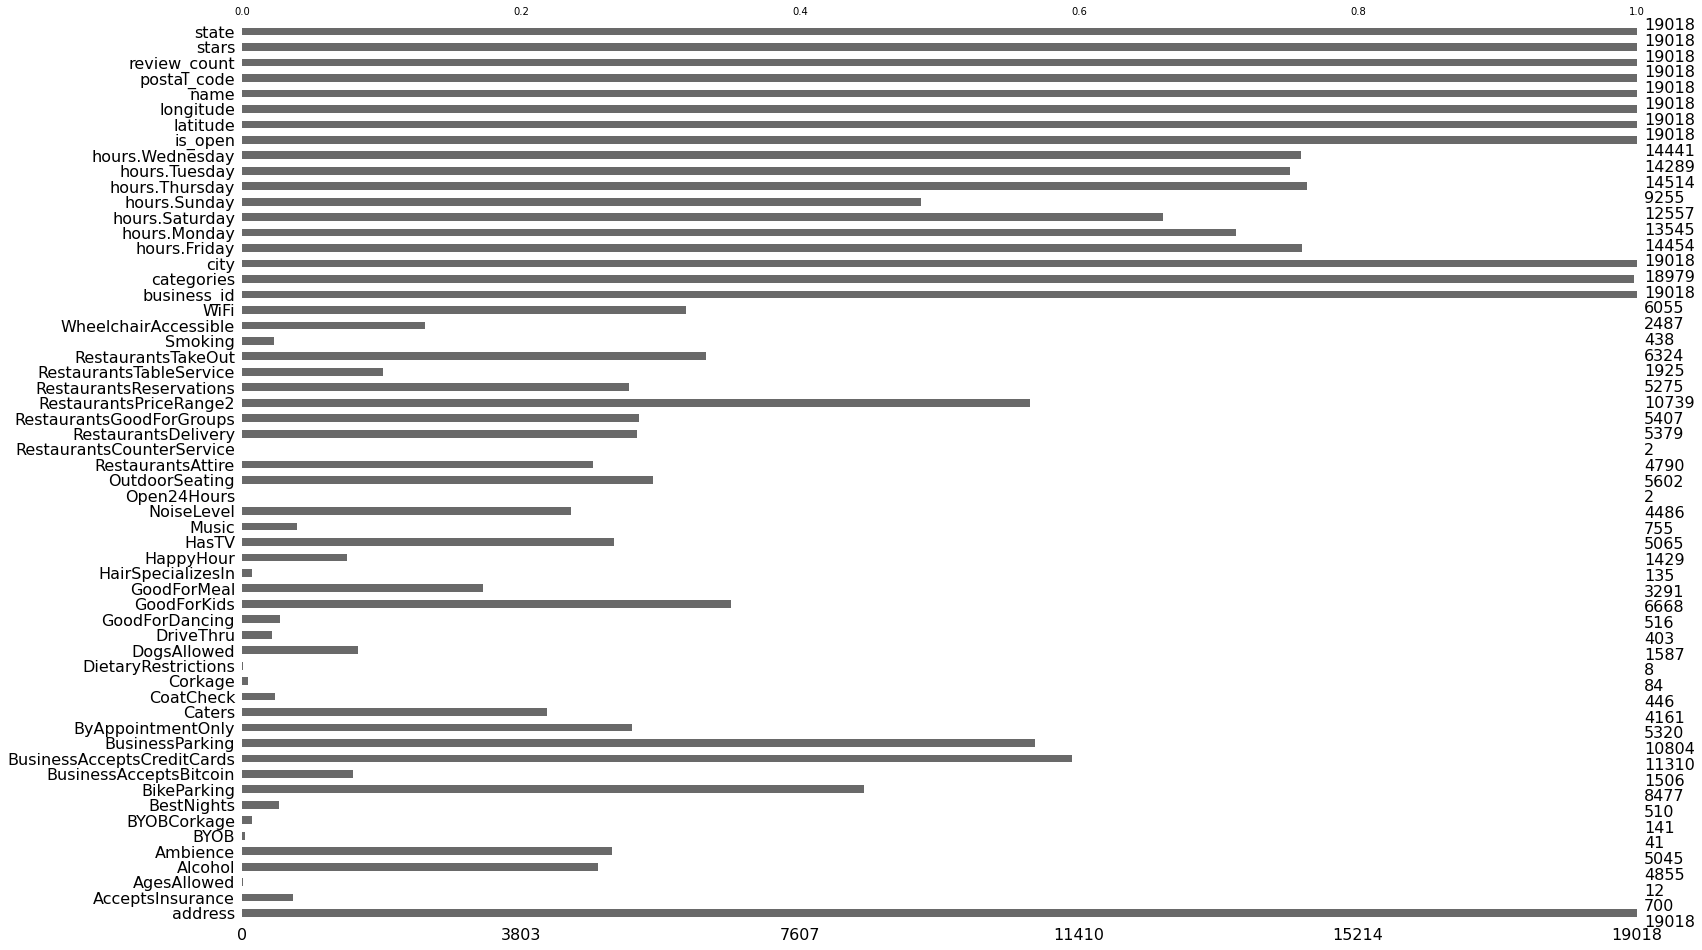

In [0]:
# Check Null values 
business_df.isnull().sum()
import missingno as msno
msno.bar(business_df)

# The atribute columns have a lot of null values, so they won't be used in the model
# columns to identify the business, won't be considered in the model as well

Out[37]: <matplotlib.collections.PathCollection at 0x7fa7c4de6fa0>

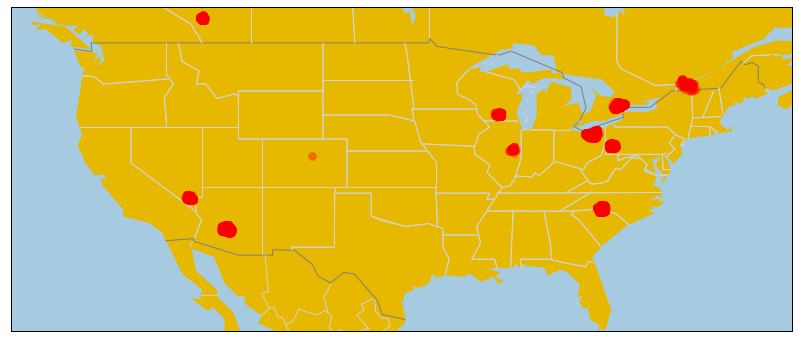

In [0]:
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(14, 8), edgecolor='w')
m = Basemap(llcrnrlon=-130, llcrnrlat=25, urcrnrlon=-65.,urcrnrlat=52., lat_0 = 40., lon_0 = -80)
m.drawmapboundary(fill_color='#A6CAE0', color="black")
m.fillcontinents(color='#e6b800',lake_color='#A6CAE0')
m.drawcountries(color='grey', linewidth=1)
# Show states
m.drawstates(color='lightgrey', linewidth=1)

mloc = m(business_df['latitude'].tolist(), business_df['longitude'].tolist())
m.scatter(mloc[1],mloc[0],color ='red',lw=3,alpha=0.3,zorder=5)

Maximum number of category 37
Median category of business 4.0
/databricks/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


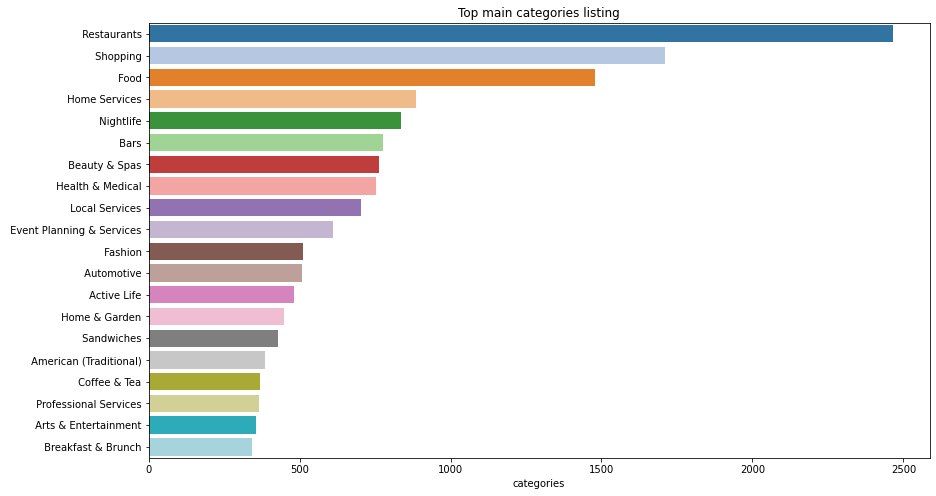

In [0]:
business_1 = business_df.dropna(subset=['categories'])
business_1
print('Maximum number of category',business_1['categories'].str.split(',').str.len().max())
print('Median category of business',business_1['categories'].str.split(',').str.len().median())
corpus = ' '.join(business_1['categories'])

corpus = pd.DataFrame(corpus.split(','),columns=['categories'])
cnt = corpus['categories'].value_counts().to_frame()[:20]
plt.figure(figsize=(14,8))
sns.barplot(cnt['categories'], cnt.index, palette = 'tab20')
plt.title('Top main categories listing')
plt.subplots_adjust(wspace=0.3)
plt.show()

In [0]:
# check unique values
print("num observations " + str(business.select(col("business_id")).count()))
print("unique business_id " + str(business.select(col("business_id")).distinct().count()))
print("unique city " + str(business.select(col("city")).distinct().count()))
print("unique state " + str(business.select(col("state")).distinct().count()))
print("unique Is_open " + str(business.select(col("Is_open")).distinct().count()))

# fill null values of city
business.select(col("city")).na.fill(0)

num observations 19018
unique business_id 19018
unique city 495
unique state 16
unique Is_open 2
Out[39]: DataFrame[city: string]

In [0]:
# Select columns to be used in the model
business_sp = business.select(col("business_id"),col("city"),col("state"),col("stars"),col("review_count"),col("Is_open"),col("categories"))
business_sp = business_sp.withColumnRenamed("review_count","review_count_bus")

In [0]:
#Extract category
business_sp = business_sp.withColumn('First_category', split(business_sp['categories'], ',').getItem(0))
cat = business_sp.groupby('First_category').count()
cat = cat.where(col("count")>=30).select("First_category",'count')
business_sp = business_sp.withColumn('category', when(col('First_category').isin('Restaurants', 'Food', 'Pizza',
'Fast Food', 'Sandwiches', 'Mexican', 'American', 'Italian', 'Breakfast & Brunch', 'Chinese', 'Burgers', 'Bakeries', 'American (New)', 'Specialty Food', 'Grocery', 'Sushi Bars', 'Desserts', 'Ice Cream & Frozen Yogurt', 'Japanese', 'Cafes', 'Seafood', 'Thai', 'Vietnamese', 'Salad', 'Chicken Wings', 'Diners', 'Delis', 'Indian', 'Caterers', 'Asian Fusion', 'Barbeque', 'Juice Bars & Smoothies', 'Steakhouses', 'Local Flavor', 'Greek', 'Canadian (New)', 'Vegeterian', 'Middle Eastern', 'Korean', 'Mediterranean', 'Hotels', 'Coffee & Tea', 'American (Traditional)'   ), 'Food&Beverage').otherwise(when(col('First_category').isin('Day Spas', 'Beauty & Spas', 'Sporting Goods', 'Gyms', 'Hair Stylists', 'Hair Salons', 'Car Dealers', 'Home Cleaning', 'Home Cleaning', 'Massage', 'Mobile Phones',  'Pet Groomers', 'Jewelry', 'Car Wash', 'Hair Removal', 'Waxing', 'Dry Cleaning & Laundry', 'Pet Stores', "Men's Clothing", 'Optometrists', 'Furniture Stores', 'Accessories', 'Hotels & Travel', 'Home Services', 'Body Shops',   'Fitness & Instruction', 'Car Rental', 'Shopping', 'Skin Care', 'Nail Salons',  'Barbers', 'Active Life', 'Shoe Stores', 'Home & Garden', 'Eyewear & Opticians', 'Massage Therapy', 'Laundry Services', "Women's Clothing", 'Eyelash Service', 'Fashion', 'Cosmetics & Beauty Supply', 'Gyms', 'Sporting Goods', 'Local Services'), 'Beauty and lifestyle'). when(col('First_category').isin('Pubs', 'Bars', 'Beer', 'Event Planning & Services', 'Arts & Entertainment', 'Nightlife', 'Venues & Event Spaces', 'Lounges'), 'Nightlife').when(col('First_category').isin('Local Services', 'Discount Store', 'Tires', 'Real Estate Services', 'Plumbing', 'Auto Repair', 'Landscaping', 'Professional Services', 'Electronics', 'Heating & Air Conditioning/HVAC', 'Convenience Stores', 'Auto Parts & Supplies', 'Contractors', 'Financial Services'), 'Services and appliances').when(col('First_category').isin('Medical Centers', 'Drugstores', 'Pet Services', 'Health & Medical', 'Pets', 'Doctors', 'Dentists', 'Veterinarians'), 'Health').otherwise('other')))
# dummy enconding categories
from pyspark.ml.feature import OneHotEncoder, StringIndexer
#String indexing
indexer = StringIndexer(inputCol="category", outputCol="catNumericIndex")
df = indexer.fit(business_sp).transform(business_sp.select("category"))
#One-hot encoding
ohe = OneHotEncoder().setInputCol("catNumericIndex").setOutputCol("categoryInd2")
df = ohe.fit(df).transform(df)
#  gather the distinct values
distinct_values = list(df.select("category")
                       .distinct()
                       .toPandas()["category"])
for distinct_value in distinct_values:
    function = udf(lambda item: 
                   1 if item == distinct_value else 0, 
                   IntegerType())
    new_column_name = "Category"+'_'+distinct_value
    business_sp = business_sp.withColumn(new_column_name, function(col("category")))

In [0]:
business_sp = business_sp.drop("categories","First_category","category")
business_sp.display(5)

business_id,city,state,stars,review_count_bus,Is_open,Category_Nightlife,Category_Health,Category_other,Category_Food&Beverage,Category_Beauty and lifestyle,Category_Services and appliances
-00iClV0kYHkvipphtNn7Q,Etobicoke,ON,4.0,8,1,0,0,0,0,1,0
-0FA-Qdi3SPYIoJz9UQw-A,Markham,ON,4.0,14,1,0,0,0,0,1,0
-0KMvRFwDWdVBeTpT11iHw,Richmond Hill,ON,2.5,3,1,0,0,0,1,0,0
-0LPtgJC31FWMrMv317p0Q,Akron,OH,3.0,5,1,0,0,1,0,0,0
-0T0jfPnuBRdpNTXpOQZcA,Markham,ON,1.5,6,1,0,0,0,1,0,0
-0aOudcaAyac0VJbMX-L1g,Toronto,ON,3.0,15,1,0,0,0,1,0,0
-0mgn9dRi95otXd_h61LdA,North York,ON,3.5,23,0,0,0,1,0,0,0
-0nEqS3_A_nnUut4DrEPEg,Pittsburgh,PA,5.0,3,0,0,0,1,0,0,0
-1E2CQu_38mkghvmZgCCRw,Westlake,OH,3.5,3,1,0,0,0,0,1,0
-1MVd6ljY2JT6gCKnrc-uw,Las Vegas,NV,3.0,12,1,0,0,1,0,0,0


In [0]:
# Tip Table 
checkin = spark.read.json("/FileStore/tables/parsed_checkin.json")
checkin.printSchema()

# Creating pandas dataframe to visualize the table
checkin_df = checkin.toPandas()
checkin_df.head(2)

root
 |-- business_id: string (nullable = true)
 |-- date: string (nullable = true)



,business_id,date
0,hihud--QRriCYZw1zZvW4g,2013-03-17 00:41:53
1,hihud--QRriCYZw1zZvW4g,2013-03-17 02:41:06


In [0]:
#Count the number of nulls values per column
from pyspark.sql.functions import isnan, when, count, col
checkin.select([count(when(col(c).isNull(), c)).alias(c) for c in checkin.columns]).show()

+-----------+----+
|business_id|date|
+-----------+----+
|          0|   0|
+-----------+----+



In [0]:
#Count unique values per column
print("num observations " + str(checkin.select(col("business_id")).count()))
from pyspark.sql.functions import isnan, when, count, col
checkin.select([countDistinct(col(c)).alias(c) for c in checkin.columns]).show()

num observations 1990914
+-----------+-------+
|business_id|   date|
+-----------+-------+
|      16244|1979360|
+-----------+-------+



In [0]:
# formatting date column to date formatt and transform dates in week days
spark.conf.set("spark.sql.legacy.timeParserPolicy","LEGACY")
checkin = checkin.withColumn("input_timestamp",to_timestamp(col("date"))).withColumn("week_day", date_format(col("input_timestamp"), "E"))

# filter date according to timeline
checkin = checkin.where(col("date")>date_timeline)
  
checkin.show(1)

+--------------------+--------------------+-------------------+--------+
|         business_id|                date|    input_timestamp|week_day|
+--------------------+--------------------+-------------------+--------+
|hihud--QRriCYZw1z...| 2019-01-01 00:33:10|2019-01-01 00:33:10|     Tue|
+--------------------+--------------------+-------------------+--------+
only showing top 1 row



In [0]:
# aggregating data

# dummy enconding week_day
categ = checkin.select('week_day').distinct().rdd.flatMap(lambda x:x).collect()
exprs = [when(col('week_day') == cat,1).otherwise(0)\
            .alias(str(cat)) for cat in categ]
checkin_sp = checkin.select(checkin.columns+exprs)

# group variables
checkin_sp = checkin_sp.groupBy("business_id").agg(count("business_id").alias("count_checkin"),sum("Mon").alias("checkin_Mon"),sum("Tue").alias("checkin_Tue"),sum("Wed").alias("checkin_Wed"),sum("Thu").alias("checkin_Thu"),sum("Fri").alias("checkin_Fri"),sum("Sat").alias("checkin_Sat"),sum("Sun").alias("checkin_Sun"))
checkin_sp.show(5)

+--------------------+-------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|         business_id|count_checkin|checkin_Mon|checkin_Tue|checkin_Wed|checkin_Thu|checkin_Fri|checkin_Sat|checkin_Sun|
+--------------------+-------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|DloBjCZHlz0lzsrQJ...|            1|          0|          0|          0|          1|          0|          0|          0|
|OGkOiPuixtFgxtLyT...|            1|          0|          1|          0|          0|          0|          0|          0|
|vQGZjrDiDBuznOkUe...|            1|          0|          0|          0|          0|          1|          0|          0|
|3ox9g3-BfQiwPAMOE...|            6|          2|          0|          0|          1|          0|          2|          1|
|TTVwcuc1Nz4ZSZH4w...|            2|          0|          0|          0|          0|          2|          0|          0|
+--------------------+----------

In [0]:
# Tip Table 
tip = spark.read.json("/FileStore/tables/parsed_tip.json")
tip.printSchema()

# Creating pandas dataframe to visualize the table
tip_df = tip.toPandas()
tip_df.head(2)

root
 |-- business_id: string (nullable = true)
 |-- compliment_count: long (nullable = true)
 |-- date: string (nullable = true)
 |-- text: string (nullable = true)
 |-- user_id: string (nullable = true)



,business_id,compliment_count,date,text,user_id
0,rcaPajgKOJC2vo_l3xa42A,0,2012-05-29 02:05:56,Kelly is an awesome waitress there!,2hdR7KYAmnCk2FjTnPFsuw
1,-wDNRL4lm1UgeFLG9KcrjQ,0,2016-04-19 09:33:45,Great food. Been there a hand full of times an...,XhGn2quN9IzMI4HkMSJ7nA


In [0]:
#Count the number of nulls values per column
from pyspark.sql.functions import isnan, when, count, col
tip.select([count(when(col(c).isNull(), c)).alias(c) for c in tip.columns]).show()

+-----------+----------------+----+----+-------+
|business_id|compliment_count|date|text|user_id|
+-----------+----------------+----+----+-------+
|          0|               0|   0|   0|      0|
+-----------+----------------+----+----+-------+



In [0]:
#Count unique values per column
print("num observations " + str(tip.select(col("business_id")).count()))
from pyspark.sql.functions import isnan, when, count, col
tip.select([countDistinct(col(c)).alias(c) for c in tip.columns]).show()

num observations 124161
+-----------+----------------+------+------+-------+
|business_id|compliment_count|  date|  text|user_id|
+-----------+----------------+------+------+-------+
|      12578|               7|124096|119769|  68774|
+-----------+----------------+------+------+-------+



In [0]:
# formatting date column to date formatt
tip = tip.withColumn("date",to_date(col("date"),"yyyy-MM-dd HH:mm:ss").alias("date"))

# filter date according to timeline
tip = tip.where(col("date")>date_timeline)

tip.show(1)

+--------------------+----------------+----------+--------------------+--------------------+
|         business_id|compliment_count|      date|                text|             user_id|
+--------------------+----------------+----------+--------------------+--------------------+
|DyVteo8Blf5gEfC9Q...|               0|2019-02-18|its snowing in Ve...|Ryxj0u0AW3mRsRypd...|
+--------------------+----------------+----------+--------------------+--------------------+
only showing top 1 row



In [0]:
# processing text



In [0]:
# aggregating data
tip_sp = tip.groupBy("business_id").agg(count("business_id").alias("tip_count"),sum("compliment_count").alias("tip_compliments_total"))
tip_sp.show(5)

+--------------------+---------+---------------------+
|         business_id|tip_count|tip_compliments_total|
+--------------------+---------+---------------------+
|r-W1HPIZ3V6S2DaXh...|        2|                    0|
|3ox9g3-BfQiwPAMOE...|        3|                    0|
|vbUABNAQI2iwN7v0x...|        1|                    0|
|x1fx7C_tc064cFATj...|        1|                    0|
|V_maCS_uBRMjqa_BC...|        1|                    0|
+--------------------+---------+---------------------+
only showing top 5 rows



In [0]:
# review Table 
review = spark.read.json("/FileStore/tables/parsed_review.json")
review.printSchema()

# Creating pandas dataframe to visualize the table
review_df = tip.toPandas()
review_df.head(2)

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: long (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)



,business_id,compliment_count,date,text,user_id
0,DyVteo8Blf5gEfC9QbJE9A,0,2019-02-18,its snowing in Vegas!,Ryxj0u0AW3mRsRypdYli2A
1,1Mfv9bC15ybzVGH9lGhWAw,0,2019-08-25,Pet products available,bLbSNkLggFnqwNNzzq-Ijw


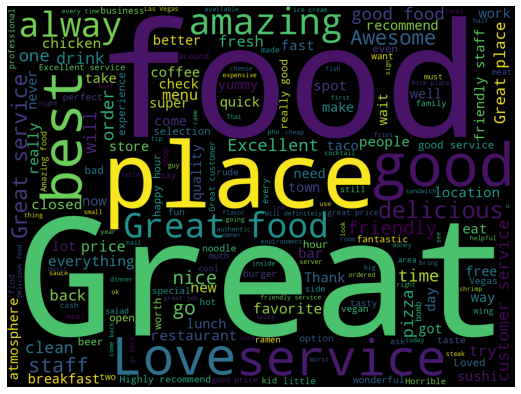

In [0]:
from wordcloud import WordCloud
# Word cloud
cloud = WordCloud(width=1440, height= 1080,max_words= 200).generate(' '.join(review_df['text'].astype(str)))
plt.figure(figsize=(10, 7))
plt.imshow(cloud)
plt.axis('off');

In [0]:
#Count the number of nulls values per column
from pyspark.sql.functions import isnan, when, count, col
review.select([count(when(col(c).isNull(), c)).alias(c) for c in review.columns]).show()

+-----------+----+----+-----+---------+-----+----+------+-------+
|business_id|cool|date|funny|review_id|stars|text|useful|user_id|
+-----------+----+----+-----+---------+-----+----+------+-------+
|          0|   0|   0|    0|        0|    0|   0|     0|      0|
+-----------+----+----+-----+---------+-----+----+------+-------+



In [0]:
#Count unique values per column
print("num observations " + str(review.select(col("business_id")).count()))
from pyspark.sql.functions import isnan, when, count, col
review.select([countDistinct(col(c)).alias(c) for c in review.columns]).show()

num observations 500000
+-----------+----+------+-----+---------+-----+------+------+-------+
|business_id|cool|  date|funny|review_id|stars|  text|useful|user_id|
+-----------+----+------+-----+---------+-----+------+------+-------+
|      19018|  68|499267|   65|   500000|    5|499167|    85| 305084|
+-----------+----+------+-----+---------+-----+------+------+-------+



In [0]:
# formatting date column to date formatt
review = review.withColumn("date",to_date(col("date"),"yyyy-MM-dd HH:mm:ss").alias("date"))

# filter date according to timeline
review = review.where(col("date")>date_timeline)

review.show(1)

+--------------------+----+----------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|      date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+----------+-----+--------------------+-----+--------------------+------+--------------------+
|5eV8oUGdBXylwB7He...|   0|2019-01-02|    0|Vx-DPb4olxt1Zxf9d...|    4|Top notch cuisine...|     0|Donht4mLJ4aO4FQhq...|
+--------------------+----+----------+-----+--------------------+-----+--------------------+------+--------------------+
only showing top 1 row



In [0]:
## processing text



In [0]:
# calculate the mean centered rating/star of user

# calculate the rating average per user
user_avg = review.groupBy("user_id").agg(mean("stars").alias("start_user_mean"))

# merge user_avg table with review
review = review.join(user_avg,review["user_id"] == user_avg['user_id'],"left")

# calculate the centered mean
review = review.withColumn("start_centered_mean",review['stars'] - review["start_user_mean"])

In [0]:
# aggregating data
review_sp = review.groupBy("business_id").agg(count("business_id").alias("review_count"),mean("stars").alias("star_mean"),mean("start_centered_mean").alias("start_centered_mean"),mean("useful").alias("review_useful_mean"),mean("funny").alias("review_funny_mean"),mean("cool").alias("review_cool_mean"))

review_sp = review_sp.withColumnRenamed("review_count","review_count_rev")

review_sp.show(5)

+--------------------+----------------+-----------------+-------------------+------------------+-----------------+------------------+
|         business_id|review_count_rev|        star_mean|start_centered_mean|review_useful_mean|review_funny_mean|  review_cool_mean|
+--------------------+----------------+-----------------+-------------------+------------------+-----------------+------------------+
|dLDMU8bOLnkDTmPUr...|               3|              5.0|                0.0|               0.0|              0.0|0.3333333333333333|
|4x8W4quFhhuTZlsoU...|               1|              1.0|                0.0|               0.0|              1.0|               0.0|
|fdBB7vuO3NnMps5DZ...|               3|4.666666666666667|0.16666666666666666|               0.0|              0.0|               0.0|
|x1fx7C_tc064cFATj...|               2|              1.5|                0.0|               0.0|              0.0|               0.0|
|ATeOjZzE3VOI-RW7F...|               1|              3.0|     

In [0]:
# user Table 
#user = spark.read.json("/FileStore/tables/user.json")
#user.printSchema()

# Creating pandas dataframe to visualize the table
#user_df = user.toPandas()
#user_df.head(2)

In [0]:
#Count the number of nulls values per column
#from pyspark.sql.functions import isnan, when, count, col
#user.select([count(when(col(c).isNull(), c)).alias(c) for c in user.columns]).show()

In [0]:
#Count unique values per column
#print("num observations " + str(user.select(col("business_id")).count()))
#from pyspark.sql.functions import isnan, when, count, col
#user.select([countDistinct(col(c)).alias(c) for c in user.columns]).show()

In [0]:
# merge user with review table
#review_user = review.join(user,review["business_id"] == user['business_id'],"left")

# Creating pandas dataframe to visualize the table
#review_user = review_user.toPandas()
#review_user.head(2)

In [0]:
# Merge review with user
#review_user = review.select(col("business_id"),col("user_id"))
#review_user = review_user.join(user,review["user_id"] == user['user_id'],"left")
#review_user_sp = review_user.groupBy("business_id").mean()

In [0]:
# user Table 
covid = spark.read.json("/FileStore/tables/parsed_covid.json")
covid.printSchema()

# Creating pandas dataframe to visualize the table
covid_df = covid.toPandas()
covid_df.head(2)

root
 |-- Call To Action enabled: string (nullable = true)
 |-- Covid Banner: string (nullable = true)
 |-- Grubhub enabled: string (nullable = true)
 |-- Request a Quote Enabled: string (nullable = true)
 |-- Temporary Closed Until: string (nullable = true)
 |-- Virtual Services Offered: string (nullable = true)
 |-- business_id: string (nullable = true)
 |-- delivery or takeout: string (nullable = true)
 |-- highlights: string (nullable = true)



,Call To Action enabled,Covid Banner,Grubhub enabled,Request a Quote Enabled,Temporary Closed Until,Virtual Services Offered,business_id,delivery or takeout,highlights
0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,S8H-VShWsIUqyPoqI5Rvbw,TRUE,FALSE
1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,zeKmH-EPyxEugnuJsjpYlg,FALSE,FALSE


In [0]:
#Count the number of nulls values per column
from pyspark.sql.functions import isnan, when, count, col
covid.select([count(when(col(c).isNull(), c)).alias(c) for c in covid.columns]).show()

+----------------------+------------+---------------+-----------------------+----------------------+------------------------+-----------+-------------------+----------+
|Call To Action enabled|Covid Banner|Grubhub enabled|Request a Quote Enabled|Temporary Closed Until|Virtual Services Offered|business_id|delivery or takeout|highlights|
+----------------------+------------+---------------+-----------------------+----------------------+------------------------+-----------+-------------------+----------+
|                     0|           0|              0|                      0|                     0|                       0|          0|                  0|         0|
+----------------------+------------+---------------+-----------------------+----------------------+------------------------+-----------+-------------------+----------+



In [0]:
#Count unique values per column
print("num observations " + str(covid.select(col("business_id")).count()))
print("unique business_id " + str(covid.select(col("business_id")).distinct().count()))

num observations 19053
unique business_id 19018


In [0]:
# Drop duplicates business_id
covid = covid.dropDuplicates(["business_id"])

In [0]:
# covid table ready to merge
covid_sp = covid.select(col("business_id"),"delivery or takeout")
covid_sp = covid_sp.withColumnRenamed("delivery or takeout","delivery_takeout")

covid_sp = covid_sp.withColumn("delivery_takeout",expr("regexp_replace(delivery_takeout, 'FALSE', 0)")).withColumn("delivery_takeout",expr("regexp_replace(delivery_takeout, 'TRUE', 1)"))

covid_sp.show(4)

+--------------------+----------------+
|         business_id|delivery_takeout|
+--------------------+----------------+
|-00iClV0kYHkvipph...|               0|
|-0FA-Qdi3SPYIoJz9...|               0|
|-0KMvRFwDWdVBeTpT...|               1|
|-0LPtgJC31FWMrMv3...|               0|
+--------------------+----------------+
only showing top 4 rows



In [0]:
# Count values in each table
print("business_sp " + str(business_sp.select(col("business_id")).count()))
print("checkin_sp " + str(business_sp.select(col("business_id")).count()))
print("tip_sp " + str(business_sp.select(col("business_id")).count()))
print("review_sp " + str(business_sp.select(col("business_id")).count()))
print("covid_sp " + str(business_sp.select(col("business_id")).count()))   

business_sp 19018
checkin_sp 19018
tip_sp 19018
review_sp 19018
covid_sp 19018


In [0]:
# Merge Tables
basetable = business_sp.join(checkin_sp,on="business_id")  .join(tip_sp,on='business_id').join(review_sp,on='business_id').join(covid_sp,on='business_id')
basetable.display(4)

business_id,city,state,stars,review_count_bus,Is_open,Category_Nightlife,Category_Health,Category_other,Category_Food&Beverage,Category_Beauty and lifestyle,Category_Services and appliances,count_checkin,checkin_Mon,checkin_Tue,checkin_Wed,checkin_Thu,checkin_Fri,checkin_Sat,checkin_Sun,tip_count,tip_compliments_total,review_count_rev,star_mean,start_centered_mean,review_useful_mean,review_funny_mean,review_cool_mean,delivery_takeout
fdBB7vuO3NnMps5DZ1WFLA,Toronto,ON,4.5,35,1,0,0,0,1,0,0,43,4,4,8,7,10,5,5,1,0,3,4.666666666666667,0.16666666666666666,0.0,0.0,0.0,1
4x8W4quFhhuTZlsoUHzVeA,Scottsdale,AZ,2.5,49,1,0,0,0,1,0,0,7,0,1,0,1,2,2,1,2,0,1,1.0,0.0,0.0,1.0,0.0,1
x1fx7C_tc064cFATjl4fmQ,Las Vegas,NV,3.0,116,1,0,0,0,1,0,0,26,3,2,4,1,4,6,6,1,0,2,1.5,0.0,0.0,0.0,0.0,1
72Ptc5rl771CKsE0uZ2INQ,Painesville,OH,2.5,13,1,0,0,0,1,0,0,9,2,3,0,1,3,0,0,1,0,1,1.0,0.0,0.0,0.0,0.0,1
2YUfXT7A-3rsDdWb_jzvZw,Peoria,AZ,2.5,140,1,0,0,0,0,1,0,9,2,0,0,2,2,3,0,1,0,2,1.0,0.0,0.5,0.0,0.0,0
iuya9nmV6ievrTNSOdEywg,Vaughan,ON,3.5,77,1,0,0,0,1,0,0,12,0,1,0,0,1,9,1,2,0,1,3.0,0.0,0.0,0.0,0.0,1
B4t9umS5dCUrfTfrdf15Kg,Phoenix,AZ,4.0,20,1,0,0,1,0,0,0,6,1,0,0,2,0,1,2,1,0,2,5.0,0.0,0.0,0.0,0.0,0
PhrTUiNQVA_XsK43O2TA5w,Las Vegas,NV,4.0,148,0,0,0,0,1,0,0,60,14,4,7,10,8,7,10,7,0,3,3.0,0.0,0.0,0.0,0.0,1
rvo-VcHpKy5aNTGA4mlZ_w,Toronto,ON,3.5,21,1,0,0,0,1,0,0,9,3,0,0,1,1,2,2,1,0,2,4.0,0.0,2.0,0.5,0.5,0
DeAMcv1g1quJF7QhqPSpWQ,Mesa,AZ,2.5,27,1,0,1,0,0,0,0,4,1,0,1,2,0,0,0,1,0,1,3.0,0.0,0.0,0.0,0.0,0


In [0]:
basetable.select('delivery_takeout').count()

Out[45]: 1459

In [0]:
basetable.groupBy("delivery_takeout").count().show()

+----------------+-----+
|delivery_takeout|count|
+----------------+-----+
|               0|  423|
|               1| 1036|
+----------------+-----+



In [0]:
# basetable.select(countDistinct("ID","Name")).show()

In [0]:
basetable = basetable.withColumn("checkin_Mon",col("checkin_Mon").cast("int")).withColumn("checkin_Tue",col("checkin_Tue").cast("int")).withColumn("checkin_Wed",col("checkin_Wed").cast("int")).withColumn("checkin_Thu",col("checkin_Thu").cast("int")).withColumn("checkin_Fri",col("checkin_Fri").cast("int")).withColumn("checkin_Sat",col("checkin_Sat").cast("int")).withColumn("checkin_Sun",col("checkin_Sun").cast("int")).withColumn("review_count_bus",col("review_count_bus").cast("int")).withColumn("Is_open",col("Is_open").cast("int")).withColumn("count_checkin",col("count_checkin").cast("int")).withColumn("tip_count",col("tip_count").cast("int")).withColumn("tip_compliments_total",col("tip_compliments_total").cast("int")).withColumn("review_count_rev",col("review_count_rev").cast("int")).withColumn("delivery_takeout",col("delivery_takeout").cast("int"))


#col("Category_Nightlife"),col("Category_Health"),col("Category_other"),col("Category_Food&Beverage"),col("Category_Beauty and lifestyle"),col("Category_Services and appliances"))
basetable = basetable.drop("business_id")
basetable.printSchema()

root
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- review_count_bus: integer (nullable = true)
 |-- Is_open: integer (nullable = true)
 |-- Category_Nightlife: integer (nullable = true)
 |-- Category_Health: integer (nullable = true)
 |-- Category_other: integer (nullable = true)
 |-- Category_Food&Beverage: integer (nullable = true)
 |-- Category_Beauty and lifestyle: integer (nullable = true)
 |-- Category_Services and appliances: integer (nullable = true)
 |-- count_checkin: integer (nullable = false)
 |-- checkin_Mon: integer (nullable = true)
 |-- checkin_Tue: integer (nullable = true)
 |-- checkin_Wed: integer (nullable = true)
 |-- checkin_Thu: integer (nullable = true)
 |-- checkin_Fri: integer (nullable = true)
 |-- checkin_Sat: integer (nullable = true)
 |-- checkin_Sun: integer (nullable = true)
 |-- tip_count: integer (nullable = false)
 |-- tip_compliments_total: integer (nullable = true)
 |-- review_coun

In [0]:
basetable.show(2)

+----------+-----+-----+----------------+-------+------------------+---------------+--------------+----------------------+-----------------------------+--------------------------------+-------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+---------+---------------------+----------------+-----------------+-------------------+------------------+-----------------+----------------+----------------+
|      city|state|stars|review_count_bus|Is_open|Category_Nightlife|Category_Health|Category_other|Category_Food&Beverage|Category_Beauty and lifestyle|Category_Services and appliances|count_checkin|checkin_Mon|checkin_Tue|checkin_Wed|checkin_Thu|checkin_Fri|checkin_Sat|checkin_Sun|tip_count|tip_compliments_total|review_count_rev|        star_mean|start_centered_mean|review_useful_mean|review_funny_mean|review_cool_mean|delivery_takeout|
+----------+-----+-----+----------------+-------+------------------+---------------+--------------+-----------------

In [0]:
#Create categorical variables for gender and class
from pyspark.ml.feature import OneHotEncoder, StringIndexer
from pyspark.ml import Pipeline

#City
cityIndxr = StringIndexer().setInputCol("city").setOutputCol("cityInd")

#state
stateIndxr = StringIndexer().setInputCol("state").setOutputCol("stateInd")

#One-hot encoding
ohee_catv = OneHotEncoder(inputCols=["cityInd","stateInd"],outputCols=["city_dum","state_dum"])
pipe_catv = Pipeline(stages=[cityIndxr, stateIndxr, ohee_catv])

basetable_final = pipe_catv.fit(basetable).transform(basetable)
basetable_final = basetable_final.drop("cityInd","stateInd")
basetable_final.show(3)

+----------+-----+-----+----------------+-------+------------------+---------------+--------------+----------------------+-----------------------------+--------------------------------+-------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+---------+---------------------+----------------+-----------------+-------------------+------------------+-----------------+----------------+----------------+---------------+--------------+
|      city|state|stars|review_count_bus|Is_open|Category_Nightlife|Category_Health|Category_other|Category_Food&Beverage|Category_Beauty and lifestyle|Category_Services and appliances|count_checkin|checkin_Mon|checkin_Tue|checkin_Wed|checkin_Thu|checkin_Fri|checkin_Sat|checkin_Sun|tip_count|tip_compliments_total|review_count_rev|        star_mean|start_centered_mean|review_useful_mean|review_funny_mean|review_cool_mean|delivery_takeout|       city_dum|     state_dum|
+----------+-----+-----+----------------+-------+-----

In [0]:
#Drop city and state from the basetable
basetable_final = basetable_final.drop("city", "state")
basetable_final.show(3)

+-----+----------------+-------+------------------+---------------+--------------+----------------------+-----------------------------+--------------------------------+-------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+---------+---------------------+----------------+-----------------+-------------------+------------------+-----------------+----------------+----------------+---------------+--------------+
|stars|review_count_bus|Is_open|Category_Nightlife|Category_Health|Category_other|Category_Food&Beverage|Category_Beauty and lifestyle|Category_Services and appliances|count_checkin|checkin_Mon|checkin_Tue|checkin_Wed|checkin_Thu|checkin_Fri|checkin_Sat|checkin_Sun|tip_count|tip_compliments_total|review_count_rev|        star_mean|start_centered_mean|review_useful_mean|review_funny_mean|review_cool_mean|delivery_takeout|       city_dum|     state_dum|
+-----+----------------+-------+------------------+---------------+--------------+------

In [0]:
#Create a train and test set with a 70% train, 30% test split
basetable_train, basetable_test = basetable_final.randomSplit([0.7, 0.3],seed=123)

print(basetable_train.count())
print(basetable_test.count())

1009
450


In [0]:
#Transform the tables in a table of label, features format
from pyspark.ml.feature import RFormula

trainBig = RFormula(formula="delivery_takeout ~ . - business_id").fit(basetable_final).transform(basetable_final)
train = RFormula(formula="delivery_takeout ~ . - business_id").fit(basetable_train).transform(basetable_train)
test = RFormula(formula="delivery_takeout ~ . - business_id").fit(basetable_test).transform(basetable_test)
print("trainBig nobs: " + str(trainBig.count()))
print("train nobs: " + str(train.count()))
print("test nobs: " + str(test.count()))

trainBig nobs: 1459
train nobs: 1009
test nobs: 450


In [0]:
#Train a Logistic Regression model
from pyspark.ml.classification import LogisticRegression

#Define the algorithm class
lr = LogisticRegression()

#Fit the model
lrModel = lr.fit(train)

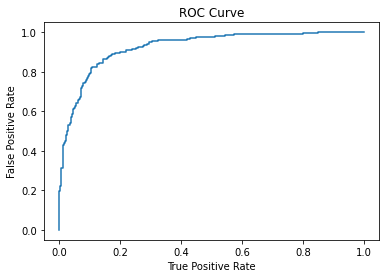

Training set areaUnderROC: 0.9248133631952212


In [0]:
# ROC Curve for Training set
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

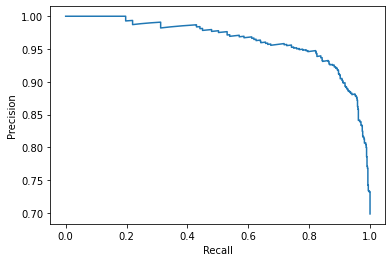

In [0]:
# Precission and Recall
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [0]:
# AUC on Test Set
predictions = lrModel.transform(test)
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.8649115235217948


In [0]:
# predictions.show(2)
#sparkDF=spark.createDataFrame(predictions) 
#predictions.coalesce(2).write.format("com.databricks.spark.csv").option("header", "true").save("dbfs:/FileStore/tables/predictionsLR.csv")

# predictions.coalesce(1).write.format("com.databricks.spark.csv").option("header", "true").save("dbfs:/FileStore/df/Sample.csv")

predictions.coalesce(1).write.format("com.databricks.spark.json").option("header", "true").option("delimiter", "\t").option("compression", "gzip").save("dbfs:/FileStore/df/fl_insurance_sample.json")

---------------------------------------------------------------------------
Py4JJavaError                             Traceback (most recent call last)
<command-371994526513198> in <module>
      5 # predictions.coalesce(1).write.format("com.databricks.spark.csv").option("header", "true").save("dbfs:/FileStore/df/Sample.csv")
      6 
----> 7 predictions.coalesce(1).write.format("com.databricks.spark.json").option("header", "true").option("delimiter", "\t").option("compression", "gzip").save("dbfs:/FileStore/df/fl_insurance_sample.json")

/databricks/spark/python/pyspark/sql/readwriter.py in save(self, path, format, mode, partitionBy, **options)
   1134             self._jwrite.save()
   1135         else:
-> 1136             self._jwrite.save(path)
   1137 
   1138     @since(1.4)

/databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py in __call__(self, *args)
   1302 
   1303         answer = self.gateway_client.send_command(command)
-> 1304         return_value = get_

In [0]:
predictions_df = predictions.toPandas()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field city_dum. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


In [0]:
predictions_df.groupby("prediction").mean()

,stars,review_count_bus,Is_open,Category_Nightlife,Category_Health,Category_other,Category_Food&Beverage,Category_Beauty and lifestyle,Category_Services and appliances,count_checkin,checkin_Mon,checkin_Tue,checkin_Wed,checkin_Thu,checkin_Fri,checkin_Sat,checkin_Sun,tip_count,tip_compliments_total,review_count_rev,star_mean,start_centered_mean,review_useful_mean,review_funny_mean,review_cool_mean,delivery_takeout,label
prediction,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,3.920354,165.265487,0.955752,0.123894,0.053097,0.407080,0.008850,0.362832,0.044248,45.548673,6.716814,5.415929,6.292035,6.150442,6.097345,7.938053,6.938053,2.221239,0.035398,2.20354,3.873915,0.016466,0.453013,0.162094,0.257817,0.283186,0.283186
1.0,3.762611,267.712166,0.982196,0.071217,0.000000,0.115727,0.813056,0.000000,0.000000,86.913947,9.967359,9.026706,9.551929,10.145401,12.290801,18.047478,17.884273,3.994065,0.020772,3.52819,3.755923,-0.000722,0.588681,0.176674,0.378484,0.887240,0.887240


In [0]:
predictions_df.groupby("prediction")["tip_count"].mean()

Out[122]: prediction
0.0    2.221239
1.0    3.994065
Name: tip_count, dtype: float64

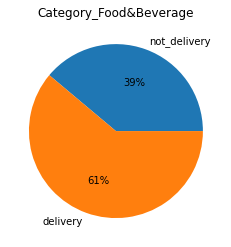

In [0]:
x = predictions_df.groupby("Category_Food&Beverage")["Category_Food&Beverage"].count()
plt.pie(x, labels = ["not_delivery", "delivery"], autopct='%1.0f%%')
plt.title("Category_Food&Beverage")
plt.show()

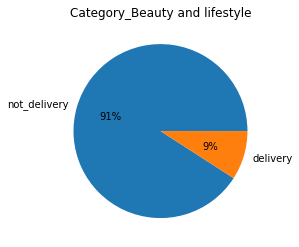

In [0]:
x = predictions_df.groupby("Category_Beauty and lifestyle")["Category_Beauty and lifestyle"].count()
plt.pie(x, labels = ["not_delivery", "delivery"], autopct='%1.0f%%')
plt.title("Category_Beauty and lifestyle")
plt.show()

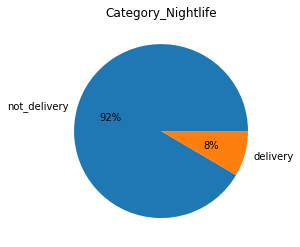

In [0]:
x = predictions_df.groupby("Category_Nightlife")["Category_Nightlife"].count()
plt.pie(x, labels = ["not_delivery", "delivery"], autopct='%1.0f%%')
plt.title("Category_Nightlife")
plt.show()

In [0]:
# ROC Curve for Training set
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

In [0]:
# Feature Importance... 
# https://github.com/xinyongtian/py_spark_ml_utils

In [0]:
# Feature Importance for Logistic Regression in Train Set
training_pred=lrModel.transform(train)
import spark_ml_utils.LogisticRegressionModel_util as lu
lu.feature_importance(lrm_model=lrModel
                      , trainDF=training_pred, trainFeatures='features'
                      , nonzero_only=True ).head(10)

,feature_index,feature_name,coef,mean,std,std_coef,feature_importance
0,12,checkin_Wed,-0.068574,9.198216,41.944317,-2.876310,2.876310
1,11,checkin_Tue,0.047138,8.876115,41.192005,1.941693,1.941693
2,10,checkin_Mon,-0.030736,9.981169,51.148871,-1.572087,1.572087
3,15,checkin_Sat,0.023530,16.713578,66.800730,1.571854,1.571854
4,14,checkin_Fri,0.030222,11.495540,47.468141,1.434578,1.434578
5,6,Category_Food&Beverage,2.192087,0.584737,0.493012,1.080724,1.080724
6,7,Category_Beauty and lifestyle,-2.852321,0.117939,0.322695,-0.920431,0.920431
7,17,tip_count,0.152730,3.584737,5.653785,0.863504,0.863504
8,43,city_dum_Mississauga,9.618095,0.007929,0.088733,0.853444,0.853444
9,69,city_dum_Beachwood,-15.009470,0.001982,0.044499,-0.667912,0.667912


In [0]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import scikitplot as skplt
import pandas as pd


# get what the predicted probabilities are to use creating cumulative gains chart
predictions = logreg.predict_proba(X)

skplt.metrics.plot_cumulative_gain(
    y, X, figsize=(12, 8), title_fontsize=20, text_fontsize=18
)
plt.show()

In [0]:
predictions_df[]

,stars,review_count_bus,Is_open,Category_Nightlife,Category_Health,Category_other,Category_Food&Beverage,Category_Beauty and lifestyle,Category_Services and appliances,count_checkin,checkin_Mon,checkin_Tue,checkin_Wed,checkin_Thu,checkin_Fri,checkin_Sat,checkin_Sun,tip_count,tip_compliments_total,review_count_rev,star_mean,start_centered_mean,review_useful_mean,review_funny_mean,review_cool_mean,delivery_takeout,city_dum,state_dum,features,label,rawPrediction,probability,prediction
0,1.5,6,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,2,1.0000,0.000000,0.000,0.500000,0.000000,1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","(1.5, 6.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",1.0,"[-12.852482334843046, 12.852482334843046]","[2.619610397594548e-06, 0.9999973803896024]",1.0
1,1.5,28,1,0,0,0,1,0,0,3,0,0,0,1,0,0,2,2,0,1,3.0000,0.000000,0.000,0.000000,0.000000,1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.5, 28.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...",1.0,"[-2.4670025994069267, 2.4670025994069267]","[0.07820403924448234, 0.9217959607555176]",1.0
2,1.5,65,1,0,0,0,1,0,0,3,1,0,1,1,0,0,0,2,0,1,1.0000,0.000000,0.000,0.000000,0.000000,1,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.5, 65.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...",1.0,"[-2.213545946308799, 2.213545946308799]","[0.09854063671129835, 0.9014593632887017]",1.0
3,1.5,106,1,0,0,0,1,0,0,3,1,0,0,0,0,1,1,1,0,4,3.0000,0.000000,0.500,0.250000,0.250000,1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.5, 106.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0...",1.0,"[-1.8238760938708605, 1.8238760938708605]","[0.13896942213466787, 0.8610305778653321]",1.0
4,1.5,126,1,0,0,0,1,0,0,18,3,3,4,1,1,4,2,2,0,1,1.0000,0.000000,1.000,0.000000,0.000000,1,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.5, 126.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0...",1.0,"[-2.0044025248030968, 2.0044025248030968]","[0.11874145953092746, 0.8812585404690725]",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,5.0,176,1,0,0,0,1,0,0,20,2,3,2,4,4,4,1,1,0,5,4.6000,0.000000,1.200,0.600000,0.800000,1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","(5.0, 176.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0...",1.0,"[-5.408894590659956, 5.408894590659956]","[0.004456635425751194, 0.9955433645742489]",1.0
446,5.0,222,1,0,0,0,1,0,0,61,10,6,6,8,8,12,11,9,0,6,5.0000,0.000000,1.000,0.000000,0.333333,1,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(5.0, 222.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0...",1.0,"[-3.0641667859014845, 3.0641667859014845]","[0.044609778335848636, 0.9553902216641513]",1.0
447,5.0,411,1,0,0,1,0,0,0,96,1,6,10,11,10,35,23,2,0,2,5.0000,0.000000,0.000,0.000000,0.000000,0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","(5.0, 411.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0...",0.0,"[-0.4603752336151723, 0.4603752336151723]","[0.3868968117929093, 0.6131031882070908]",1.0
448,5.0,506,1,0,0,0,1,0,0,1261,170,153,144,177,177,246,194,20,0,11,5.0000,0.106061,1.000,0.181818,0.818182,1,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(5.0, 506.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0...",1.0,"[-7.469188964963158, 7.469188964963158]","[0.0005700655560878882, 0.9994299344439121]",1.0


In [0]:
#Exercise: Train a RandomForest model and tune the number of trees for values [150, 300, 500]
from pyspark.ml.classification import RandomForestClassifier

#Define pipeline
rfc = RandomForestClassifier()

#Run cross-validation, and choose the best set of parameters.
rfcModel = rfc.fit(train)


In [0]:
#Get predictions on the test set
preds = rfcModel.transform(test)
#Get model accuracy
print("accuracy: " + str(evaluator.evaluate(preds)))
#Get AUC
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(preds, {evaluator.metricName: "areaUnderROC"})))

accuracy: 0.8585772677651132
Test Area Under ROC: 0.8585772677651132


In [0]:
#Get more metrics
from pyspark.mllib.evaluation import MulticlassMetrics

#Cast a DF of predictions to an RDD to access RDD methods of MulticlassMetrics
preds_labels = rfcModel.transform(test)\
  .select("prediction", "label")\
  .rdd.map(lambda x: (float(x[0]), float(x[1])))

metrics = MulticlassMetrics(preds_labels)

print("accuracy = %s" % metrics.accuracy)

accuracy = 0.86


In [0]:
#Get more metrics
from pyspark.mllib.evaluation import MulticlassMetrics

labels = preds.rdd.map(lambda lp: lp.label).distinct().collect()
for label in sorted(labels):
    print("Class %s precision = %s" % (label, metrics.precision(label)))
    print("Class %s recall = %s" % (label, metrics.recall(label)))
    print("Class %s F1 Measure = %s" % (label, metrics.fMeasure(label, beta=1.0)))

Class 0.0 precision = 0.85
Class 0.0 recall = 0.5714285714285714
Class 0.0 F1 Measure = 0.6834170854271356
Class 1.0 precision = 0.8621621621621621
Class 1.0 recall = 0.9637462235649547
Class 1.0 F1 Measure = 0.9101283880171184


In [0]:
#Prettify feature importances
import pandas as pd
def ExtractFeatureImp(featureImp, dataset, featuresCol):
    list_extract = []
    for i in dataset.schema[featuresCol].metadata["ml_attr"]["attrs"]:
        list_extract = list_extract + dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
    varlist = pd.DataFrame(list_extract)
    varlist['score'] = varlist['idx'].apply(lambda x: featureImp[x])
    return(varlist.sort_values('score', ascending = False))
  
ExtractFeatureImp(rfcModel.featureImportances, test, "features").head(10)

,idx,name,score
6,6,Category_Food&Beverage,0.342393
7,7,Category_Beauty and lifestyle,0.146493
1,1,review_count_bus,0.067425
16,16,checkin_Sun,0.041510
9,9,count_checkin,0.040824
131,131,state_dum_NV,0.035569
14,14,checkin_Fri,0.029691
12,12,checkin_Wed,0.026870
10,10,checkin_Mon,0.026250
13,13,checkin_Thu,0.022335


In [0]:
## Gradient-Boosted Tree Classifier

In [0]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter=10)
gbtModel = gbt.fit(train)
predictions = gbtModel.transform(test)

In [0]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8752443575617556


In [0]:
#Performance Evaluation
xgbpred_train = gbtModel.transform(train)
xgbpred_test = gbtModel.transform(test)
evaluator = BinaryClassificationEvaluator()
aucxbg_train = evaluator.evaluate(xgbpred_train)
aucxbg_test = evaluator.evaluate(xgbpred_test)
accuracy_train = xgbpred_train.filter(xgbpred_train.label == xgbpred_train.prediction).count() / float(xgbpred_train.count())
accuracy_test = xgbpred_test.filter(xgbpred_test.label == xgbpred_test.prediction).count() / float(xgbpred_test.count())
print("Gradient Boost Train AUC: " + str(aucxbg_train))
print("Gradient Boost Train Accuracy: " + str(accuracy_train))
print("Gradient Boost Test AUC: " + str(aucxbg_test))
print("Gradient Boost Test Accuracy: " + str(accuracy_test))

Gradient Boost Train AUC: 0.9803331466965285
Gradient Boost Train Accuracy: 0.9355797819623389
Gradient Boost Test AUC: 0.8752443575617556
Gradient Boost Test Accuracy: 0.8488888888888889


In [0]:
print(gbtModel.explainParams())

cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext. (default: 10)
featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regression), 'all' (use all features), 'onethird' (use 1/3 of the features), 'sqrt' (use sqrt(number of features)), 'log2' (use log2(number of features)), 

In [0]:
# The cluster ran into problems (terminate in 120 min), and we couldn't finish the Gridsearch for any of the models, we tried reducing the k folds to 3, and the ranges of parameters and its the same problem. 
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2, 4, 6])
             .addGrid(gbt.maxBins, [20, 60])
             .addGrid(gbt.maxIter, [10, 20])
             .build())
cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
# Run cross validations.  This can take about 6 minutes since it is training over 20 trees!
cvModel = cv.fit(train)
predictions = cvModel.transform(test)
evaluator.evaluate(predictions)

/databricks/spark/python/pyspark/ml/util.py:886: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
  warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)


In [0]:
# https://www.kaggle.com/code/sudhirnl7/basic-exploration-of-business-review-at-yelp-com
# https://stackoverflow.com/questions/28009370/get-weekday-day-of-week-for-datetime-column-of-dataframe
# https://analyticjeremy.github.io/Databricks_Examples/Write%20to%20a%20Single%20CSV%20File
# https://www.kaggle.com/code/vksbhandary/exploring-yelp-reviews-dataset
# https://sparkbyexamples.com/pyspark/convert-pandas-to-pyspark-dataframe/
# https://towardsdatascience.com/machine-learning-with-pyspark-and-mllib-solving-a-binary-classification-problem-96396065d2aa